In [14]:
import matplotlib
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
from matplotlib import colors as clrs
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [15]:
def nonlinear(x):
    return 20*np.log10(x)

def cpu2gpu(cpu_hour):
    # ad-hoc choice obtained from NCSA proposal page
    # with 700k cpu hour limit vs. 25k gpu hour limit
    conversion_factor = 25/700
    return conversion_factor * cpu_hour

def gpu2cpu(gpu_hour):
    # ad-hoc choice obtained from NCSA proposal page
    # with 700k cpu hour limit vs. 25k gpu hour limit
    conversion_factor = 700/25
    return conversion_factor * gpu_hour

In [36]:
"""
labels = [
    'DeepClean',
    'Match filt.',
    'Param. Est.\n(sampling)',
    'Follow-up',
]
x = np.array([3600, 3600, 1, 1/(24*30),]) # events/hr
y = np.array([gpu2cpu(1), 3000, 100, 10]) # Core-hours
w = np.array([30*3600, 30*3600, 30*10, 100]) # num triggers in 30 day
"""
labels = [
    'MiniAOD', #About 1 event per second (PER THREAD?), so 3600 events/hr? ~200,000 threads? Average 2ish days of compute per month, using 200,000 or so cores? Is the y axis CPU hours per year?!  About 400 kB per event for ttbar AOD events?
    'DUNE', #About 1 event per 50 seconds (PER THREAD), so 72 events/hr? ~1000 threads? 7mil events processed once per year, so that takes 100,000 core hours?  About 4 GB per event?
    'HL-LHC Reco', #3s per event (just making that up), so 1200 ev/hr (PER THREAD?)? ~200,000 threads? 200k cores running 2x per year (for 2 days?!)?  About 1 MB per event?
    'HL-LHC Trigger',
    'IceCube Data',
    'IceCube MMA',
    #'IceCube Simulation',
]
x = np.array([720000000, 72000, 240000000, 2700000000, 10000000, 11])#, 2700.*3600.]) # events/hr
y = np.array([1./3600., 1./72, 1./1200., 1./(4.*3600.), 1./25000., 1./25000.])#, 1./25000.]) # Core-hours (per event?)
z = np.array([-2, -2, -2, 1, -2, 1])#, -2])
w = np.array([400, 4000000, 4000, 5000, 100, 100])#, 700]) # should we do something like event size? in kB

In [37]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

In [38]:
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#17becf', '#7f7f7f', '#bcbd22', '#d62728']

In [39]:
plt.style.use([hep.style.ROOT, hep.style.firamath])
hep.set_style("CMS")
# hep.set_style({"font.sans-serif":'Comic Sans MS'})

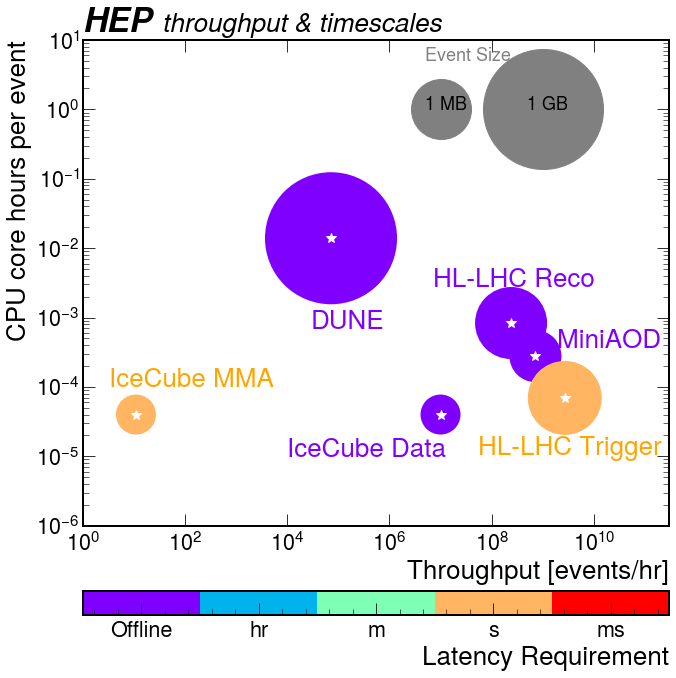

In [49]:
cmap = plt.cm.rainbow
norm = clrs.BoundaryNorm(np.arange(-2.5, 3, 1), cmap.N)

f, ax = plt.subplots()

#for xi, yi, wi, l, c in zip(x, y, w, labels, colors):
for xi, yi, wi, l, zi in zip(x, y, w, labels, z):
    #ax.plot([xi], [yi], label=l, marker='o', markersize=nonlinear(wi), color=c)
    #ax.plot([xi], [yi], label=l, marker='*', markersize=10, color='white')
    #ax.scatter([xi], [yi], c=[zi], cmap=cmap, norm=norm, s=100, edgecolor='none', label=l, marker='o', markersize=nonlinear(wi))
    #ax.scatter([xi], [yi], c=[zi], cmap=cmap, norm=norm, edgecolor='none', label=l, marker='o', s=1.*nonlinear(wi)*nonlinear(wi))
    ax.scatter([xi], [yi], c=[zi], cmap=cmap, norm=norm, edgecolor='none', label=l, s=1.*nonlinear(wi)*nonlinear(wi))
    ax.plot([xi], [yi], label=l, marker='*', markersize=10, color='white')
    if 'MiniAOD' in l:
        #ax.text(xi*0.0003, yi*0.45, l, color=cmap(zi))
        ax.text(xi*2.6, yi*1.3, l, color=cmap(zi))
    elif 'DUNE' in l:
        ax.text(xi*0.4, yi*0.05, l, color=cmap(zi))
    elif 'Reco' in l:
        ax.text(xi*0.03, yi*3.3, l, color=cmap(zi))
    elif 'Trigger' in l:
        ax.text(xi*0.02, yi*.15, l, color='orange')
    elif 'IceCube Data' in l:
        ax.text(xi*0.001, yi*.25, l, color=cmap(zi))
    elif 'IceCube MMA' in l:
        ax.text(xi*0.3, yi*2.5, l, color='orange')
    elif 'IceCube Simulation' in l:
        ax.text(xi*0.03, yi*.15, l, color=cmap(zi))
    else:
        ax.text(xi*0.8, yi*0.4, l, color=cmap(zi))




# plt.legend()
# ax.plot([300*1e-2], [1e18], label='1 TB/yr', marker='o', markersize=nonlinear(1e12), color='gray')
# ax.plot([40*2e0], [1e18], label='1 PB/yr', marker='o', markersize=nonlinear(1e15), color='gray')
# ax.plot([10*1e3], [1e18], label='1 EB/yr', marker='o', markersize=nonlinear(1e18), color='gray')
# ax.text(300*0.23e-2, 0.3e19, '1 TB/yr', color='black',size=18)
# ax.text(40*0.40e0, 0.7e19, '1 PB/yr', color='black',size=18)
# ax.text(10*0.23e3, 0.7e18, '1 EB/yr', color='white',size=18)

#ax.plot([1e7], [1], label='1 MB', marker='o', markersize=nonlinear(1000), color='gray')
#ax.plot([1e9], [1], label='1 GB', marker='o', markersize=nonlinear(1000000), color='gray')
ax.scatter([1e7], [1], label='1 MB', marker='o', s=1.*nonlinear(1000)*nonlinear(1000), color='gray')
ax.scatter([1e9], [1], label='1 GB', marker='o', s=1.*nonlinear(1000000)*nonlinear(1000000), color='gray')
ax.text(.5*1e7, 1, '1 MB', color='black',size=18)
ax.text(.5*1e9, 1, '1 GB', color='black',size=18)
ax.text(.5*1e7, 5, 'Event Size', color='grey',size=18)


hep.label.exp_text(text=" throughput & timescales",exp="HEP",italic=(True, True),loc=0,pad=0)

#ymin = 1
#ymax = 10000000000
ymin = .000001
ymax = 10
#xmin = 1e-4
xmin = 1
#xmax = 3e7
xmax = 3e11

# FPGA/ASIC contour
# ax.text(1e-7, 1e19, 'FPGA/ASIC', color='gray',size=18)
# box_y = np.array([ymin, ymin, ymax, ymax])
# box_x = np.array([xmin, 2e-3, 2e-3, xmin])
# ax.fill(box_x, box_y, 'r', alpha=0.1)

# GPU/CPU contour
# ax.text(0.3, 4e15, 'CPU/GPU', color='gray',size=18)
# box_y = np.array([ymin, ymin, 1e16, 1e16])
# box_x = np.array([1e-4, xmax, xmax, 1e-4])
# ax.fill(box_x, box_y, 'b', alpha=0.1)

#secax = ax.secondary_yaxis('right', functions=(cpu2gpu, gpu2cpu))



ax.loglog()
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel('Throughput [events/hr]')
ax.set_ylabel('CPU core hours per event')



divider = make_axes_locatable(ax)
cax = divider.new_vertical(size='5%', pad=0.9, pack_start = True)
f.add_axes(cax)
#fig.colorbar(im, cax = cax, orientation = 'horizontal')

PCM=ax.get_children()[2]
cbar = plt.colorbar(PCM, ax=ax, ticks=np.linspace(-2, 2, 5), label='Latency Requirement', cax = cax, orientation = 'horizontal')
cbar.ax.set_xticklabels(['Offline','hr','m','s', 'ms'])
#cbar.set_label('Latency Requirement', rotation=270)
#plt.colorbar(PCM, ticks=np.linspace(-2, 2, 5))
#plt.colorbar(ax=ax, ticks=np.linspace(-2, 2, 5))

#secax.set_ylabel('GPU hours')
#hep.cms.label(loc=0)

plt.tight_layout()
plt.savefig('hep-plot-v0.pdf')

In [29]:
labelsGPU = [
    'DUNE', #I said 50s per event CPU-only, so halve that for GPU-enabled, and GPU time is 10% of event, so 2.5s
    'HL-LHC Reco', #I said about 3s per event on CPU.  Let's say half of that is tracking, which we can make 20x faster, so .075s per event
    'HL-LHC Trigger', #...not really sure, but let's just use the same logic as above...
    'MiniAOD', #10% of workflow is 10x faster, so divide CPU core-hours per event by 100?
    'IceCube Sim'
]
xGPU = np.array([72000, 240000000, 2700000000, 720000000, 2700*3600]) # events/hr
yGPU = np.array([1./(3600./2.5), .075/3600., .1/(2.*4.*3600.), 1./360000., 3.7/(1000.*3600.)]) # Core-hours (per event?)
#w = np.array([30*3600, 30*3600, 30*10, 100]) # num triggers in 30 day
zGPU = np.array([-2, -2, 1, -2, -2])
wGPU = np.array([4000000, 4000, 5000, 400, 700]) # should we do something like event size? in kB

In [30]:
plt.style.use([hep.style.ROOT, hep.style.firamath])
hep.set_style("CMS")

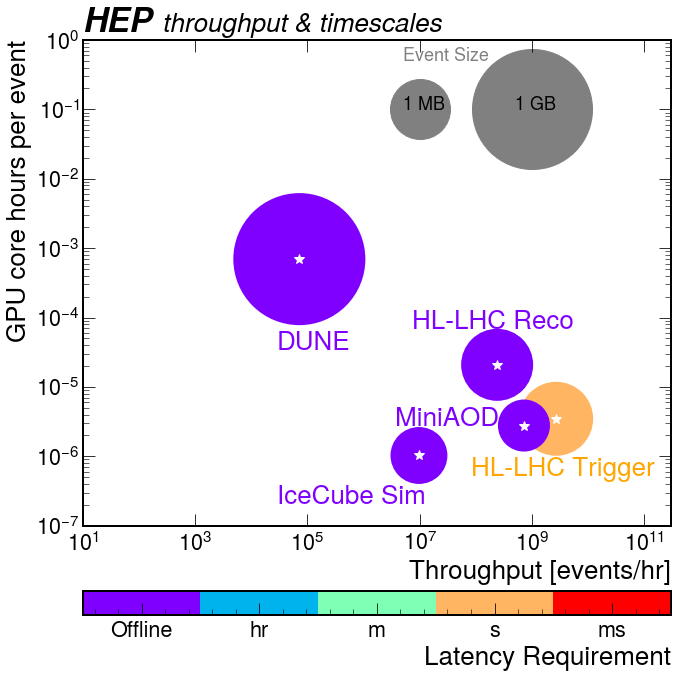

In [58]:
#cmap = plt.cm.rainbow
#norm = clrs.BoundaryNorm(np.arange(-2.5, 3, 1), cmap.N)

f, ax = plt.subplots()

for xi, yi, wi, l, zi in zip(xGPU, yGPU, wGPU, labelsGPU, zGPU):
    #ax.plot([xi], [yi], label=l, marker='o', markersize=nonlinear(wi), color=c)
    #ax.plot([xi], [yi], label=l, marker='*', markersize=10, color='white')
    #ax.scatter([xi], [yi], c=[zi], cmap=cmap, norm=norm, s=100, edgecolor='none', label=l, marker='o', markersize=nonlinear(wi))
    #ax.scatter([xi], [yi], c=[zi], cmap=cmap, norm=norm, edgecolor='none', label=l, marker='o', s=1.*nonlinear(wi)*nonlinear(wi))
    ax.scatter([xi], [yi], c=[zi], cmap=cmap, norm=norm, edgecolor='none', label=l, s=1.*nonlinear(wi)*nonlinear(wi))
    ax.plot([xi], [yi], label=l, marker='*', markersize=10, color='white')
    if 'MiniAOD' in l:
        ax.text(xi*0.005, yi*1., l, color=cmap(zi))
    elif 'DUNE' in l:
        ax.text(xi*0.4, yi*0.05, l, color=cmap(zi))
    elif 'Reco' in l:
        ax.text(xi*0.03, yi*3.3, l, color=cmap(zi))
    elif 'Trigger' in l:
        ax.text(xi*0.03, yi*.15, l, color='orange')
    elif 'IceCube Sim' in l:
        ax.text(xi*0.003, yi*.2, l, color=cmap(zi))
    else:
        ax.text(xi*0.8, yi*0.4, l, color=cmap(zi))



ax.scatter([1e7], [.1], label='1 MB', marker='o', s=1.*nonlinear(1000)*nonlinear(1000), color='gray')
ax.scatter([1e9], [.1], label='1 GB', marker='o', s=1.*nonlinear(1000000)*nonlinear(1000000), color='gray')
ax.text(.5*1e7, .1, '1 MB', color='black',size=18)
ax.text(.5*1e9, .1, '1 GB', color='black',size=18)
ax.text(.5*1e7, .5, 'Event Size', color='grey',size=18)


hep.label.exp_text(text=" throughput & timescales",exp="HEP",italic=(True, True),loc=0,pad=0)

#ymin = 1
#ymax = 10000000000
ymin = .0000001
ymax = 1
#xmin = 1e-4
xmin = 10
#xmax = 3e7
xmax = 3e11


ax.loglog()
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel('Throughput [events/hr]')
ax.set_ylabel('GPU core hours per event')



divider = make_axes_locatable(ax)
cax = divider.new_vertical(size='5%', pad=0.9, pack_start = True)
f.add_axes(cax)
#fig.colorbar(im, cax = cax, orientation = 'horizontal')

PCM=ax.get_children()[2]
cbar = plt.colorbar(PCM, ax=ax, ticks=np.linspace(-2, 2, 5), label='Latency Requirement', cax = cax, orientation = 'horizontal')
cbar.ax.set_xticklabels(['Offline','hr','m','s', 'ms'])
#cbar.set_label('Latency Requirement', rotation=270)
#plt.colorbar(PCM, ticks=np.linspace(-2, 2, 5))
#plt.colorbar(ax=ax, ticks=np.linspace(-2, 2, 5))

#secax.set_ylabel('GPU hours')
#hep.cms.label(loc=0)

plt.tight_layout()
plt.savefig('hep-gpu-plot-v0.pdf')

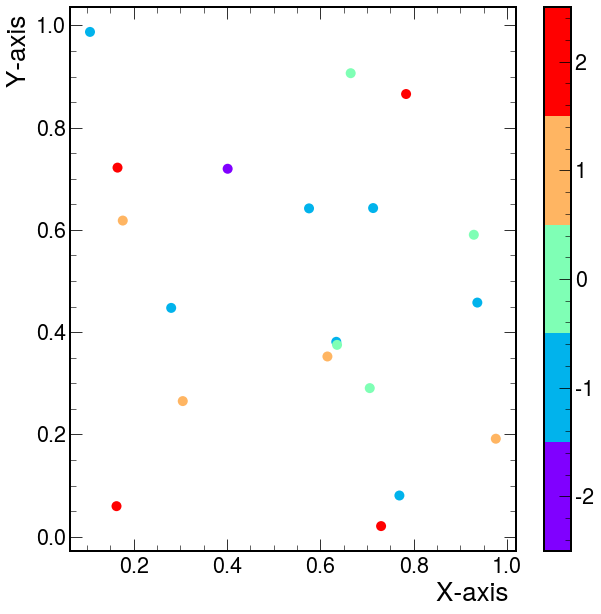

In [206]:
x = np.random.random(20)
y = np.random.random(20)
z = np.random.randint(-2, 3, 20)

plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

cmap = plt.cm.rainbow
norm = clrs.BoundaryNorm(np.arange(-2.5, 3, 1), cmap.N)

plt.scatter(x, y, c=z, cmap=cmap, norm=norm, s=100, edgecolor='none')
plt.colorbar(ticks=np.linspace(-2, 2, 5))

plt.show()